<a id='TopPage'></a>
## Initial EDA

#### Contents:

- Imports
    - [Module Imports](#LImports)
    - [Data Import](#DImports)
- EDA
    - [Describe](#Describe)
    - [Column Headers](#Columns)
    - [Standardised Boxplot](#StdBxPlt)
    - [Heatmap](#Heatmap)
    - [Pairplot](#Pairplot)
    - WordMaps:
        - [Wordcloud NTA](#Wordcloud1)
        - [Wordcloud YTA](#Wordcloud2)
    - [Top Unique Words per Class](#TopWC)


<a id='LImports'></a>
**Module Imports:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time


from sklearn.preprocessing import StandardScaler

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='DImports'></a>
**Data Imports:**

In [2]:
reddit_data = pd.read_json('Clean_Data')

In [3]:
reddit_data.created_utc = pd.to_datetime(reddit_data.created_utc.map(time.ctime))
reddit_data.retrieved_on = pd.to_datetime(reddit_data.retrieved_on.map(time.ctime))
reddit_data.updated_utc = pd.to_datetime(reddit_data.updated_utc.map(time.ctime))

<a id='Describe'></a>
**Describe:**

In [4]:
reddit_data.describe()

,gildings,num_comments,score,wls
count,5693.000000,5693.000000,5693.000000,5693.000000
mean,0.019673,76.110838,209.127349,5.989988
std,0.240708,303.960130,1409.978564,0.173037
min,0.000000,3.000000,0.000000,3.000000
25%,0.000000,15.000000,1.000000,6.000000
50%,0.000000,24.000000,3.000000,6.000000
75%,0.000000,44.000000,12.000000,6.000000
max,8.000000,8625.000000,30349.000000,6.000000


<a id='Columns'></a>
**Column Headers:**

In [5]:
reddit_data.columns

Index(['created_utc', 'gildings', 'is_crosspostable', 'is_robot_indexable',
       'no_follow', 'num_comments', 'over_18', 'retrieved_on', 'score',
       'selftext', 'send_replies', 'updated_utc', 'wls', 'Ass', 'Ass2', 'y'],
      dtype='object')

<a id='StdBxPlt'></a>
**Boxplot:**

In [6]:
scaler = StandardScaler()

red_std = pd.DataFrame(scaler.fit_transform(reddit_data[reddit_data.describe().columns]),columns=reddit_data.describe().columns) 

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


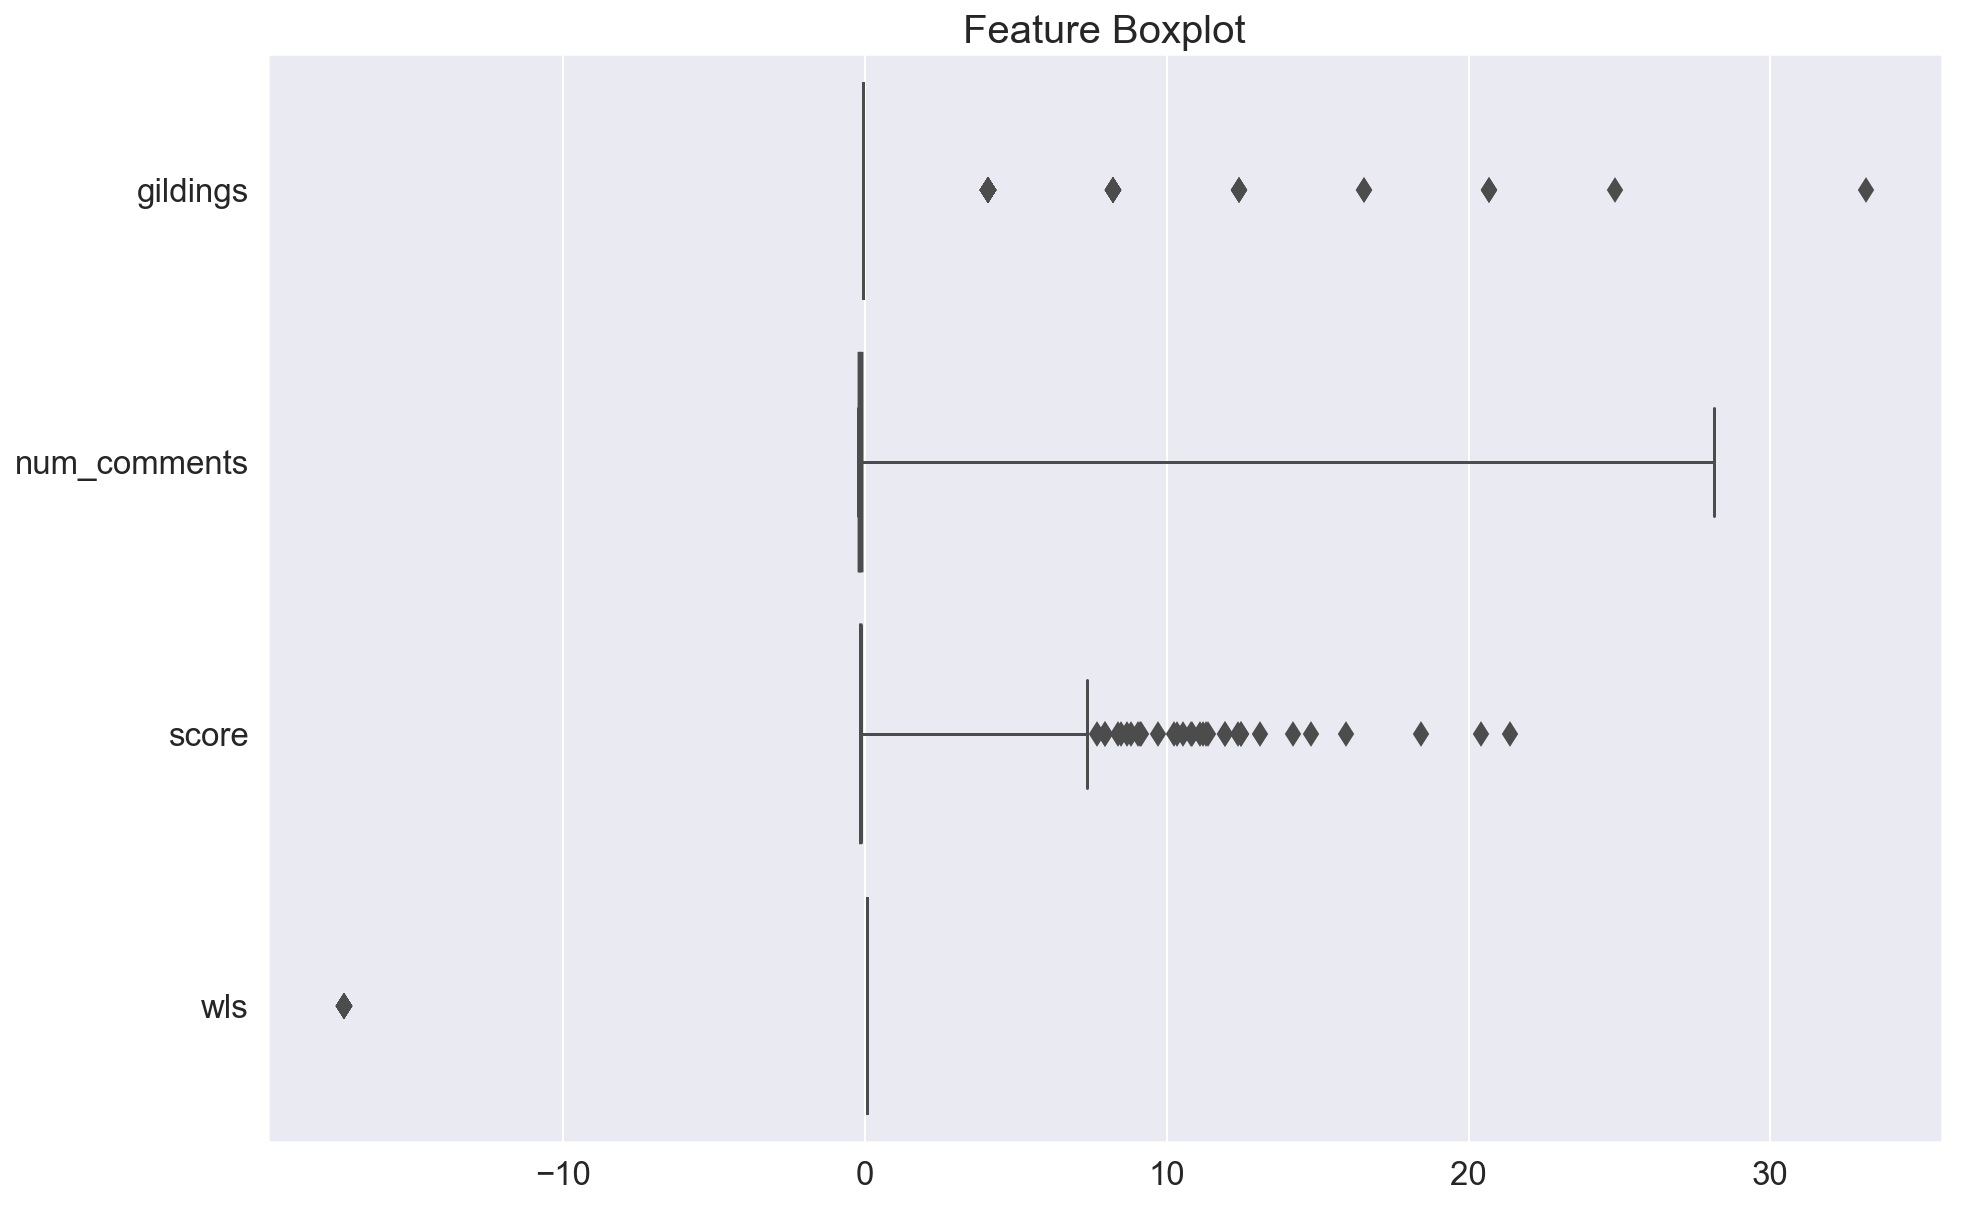

In [9]:
fig,ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=red_std, orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax, whis=1000)

ax.set_title('Feature Boxplot', fontsize=20)

plt.show()

<a id='Heatmap'></a>
**Heatmap:**

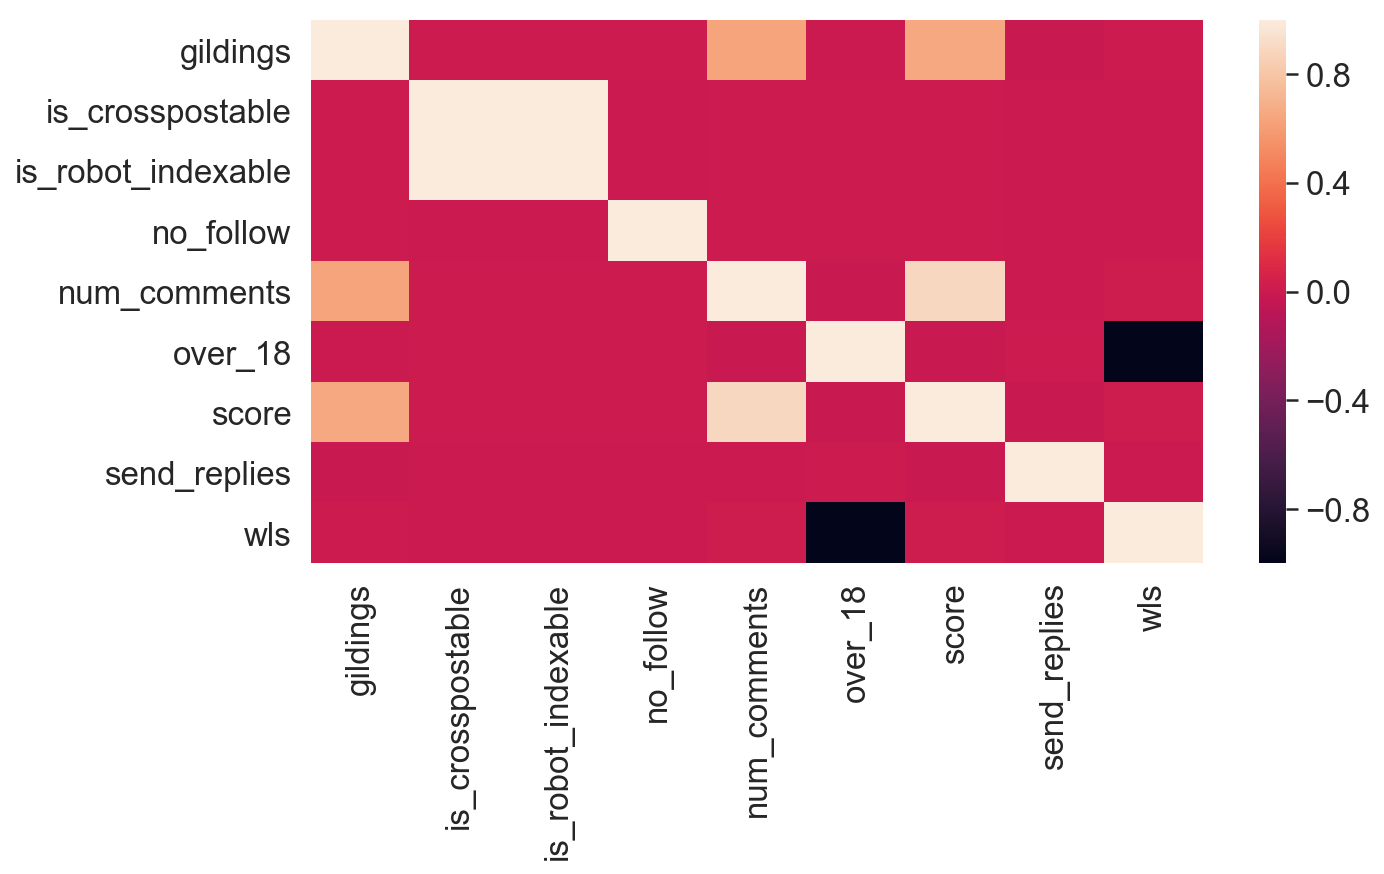

In [10]:
fig = plt.figure(figsize = [10,5])
sns.heatmap(reddit_data.corr());

<a id='Pairplot'></a>
**Pairplot:**

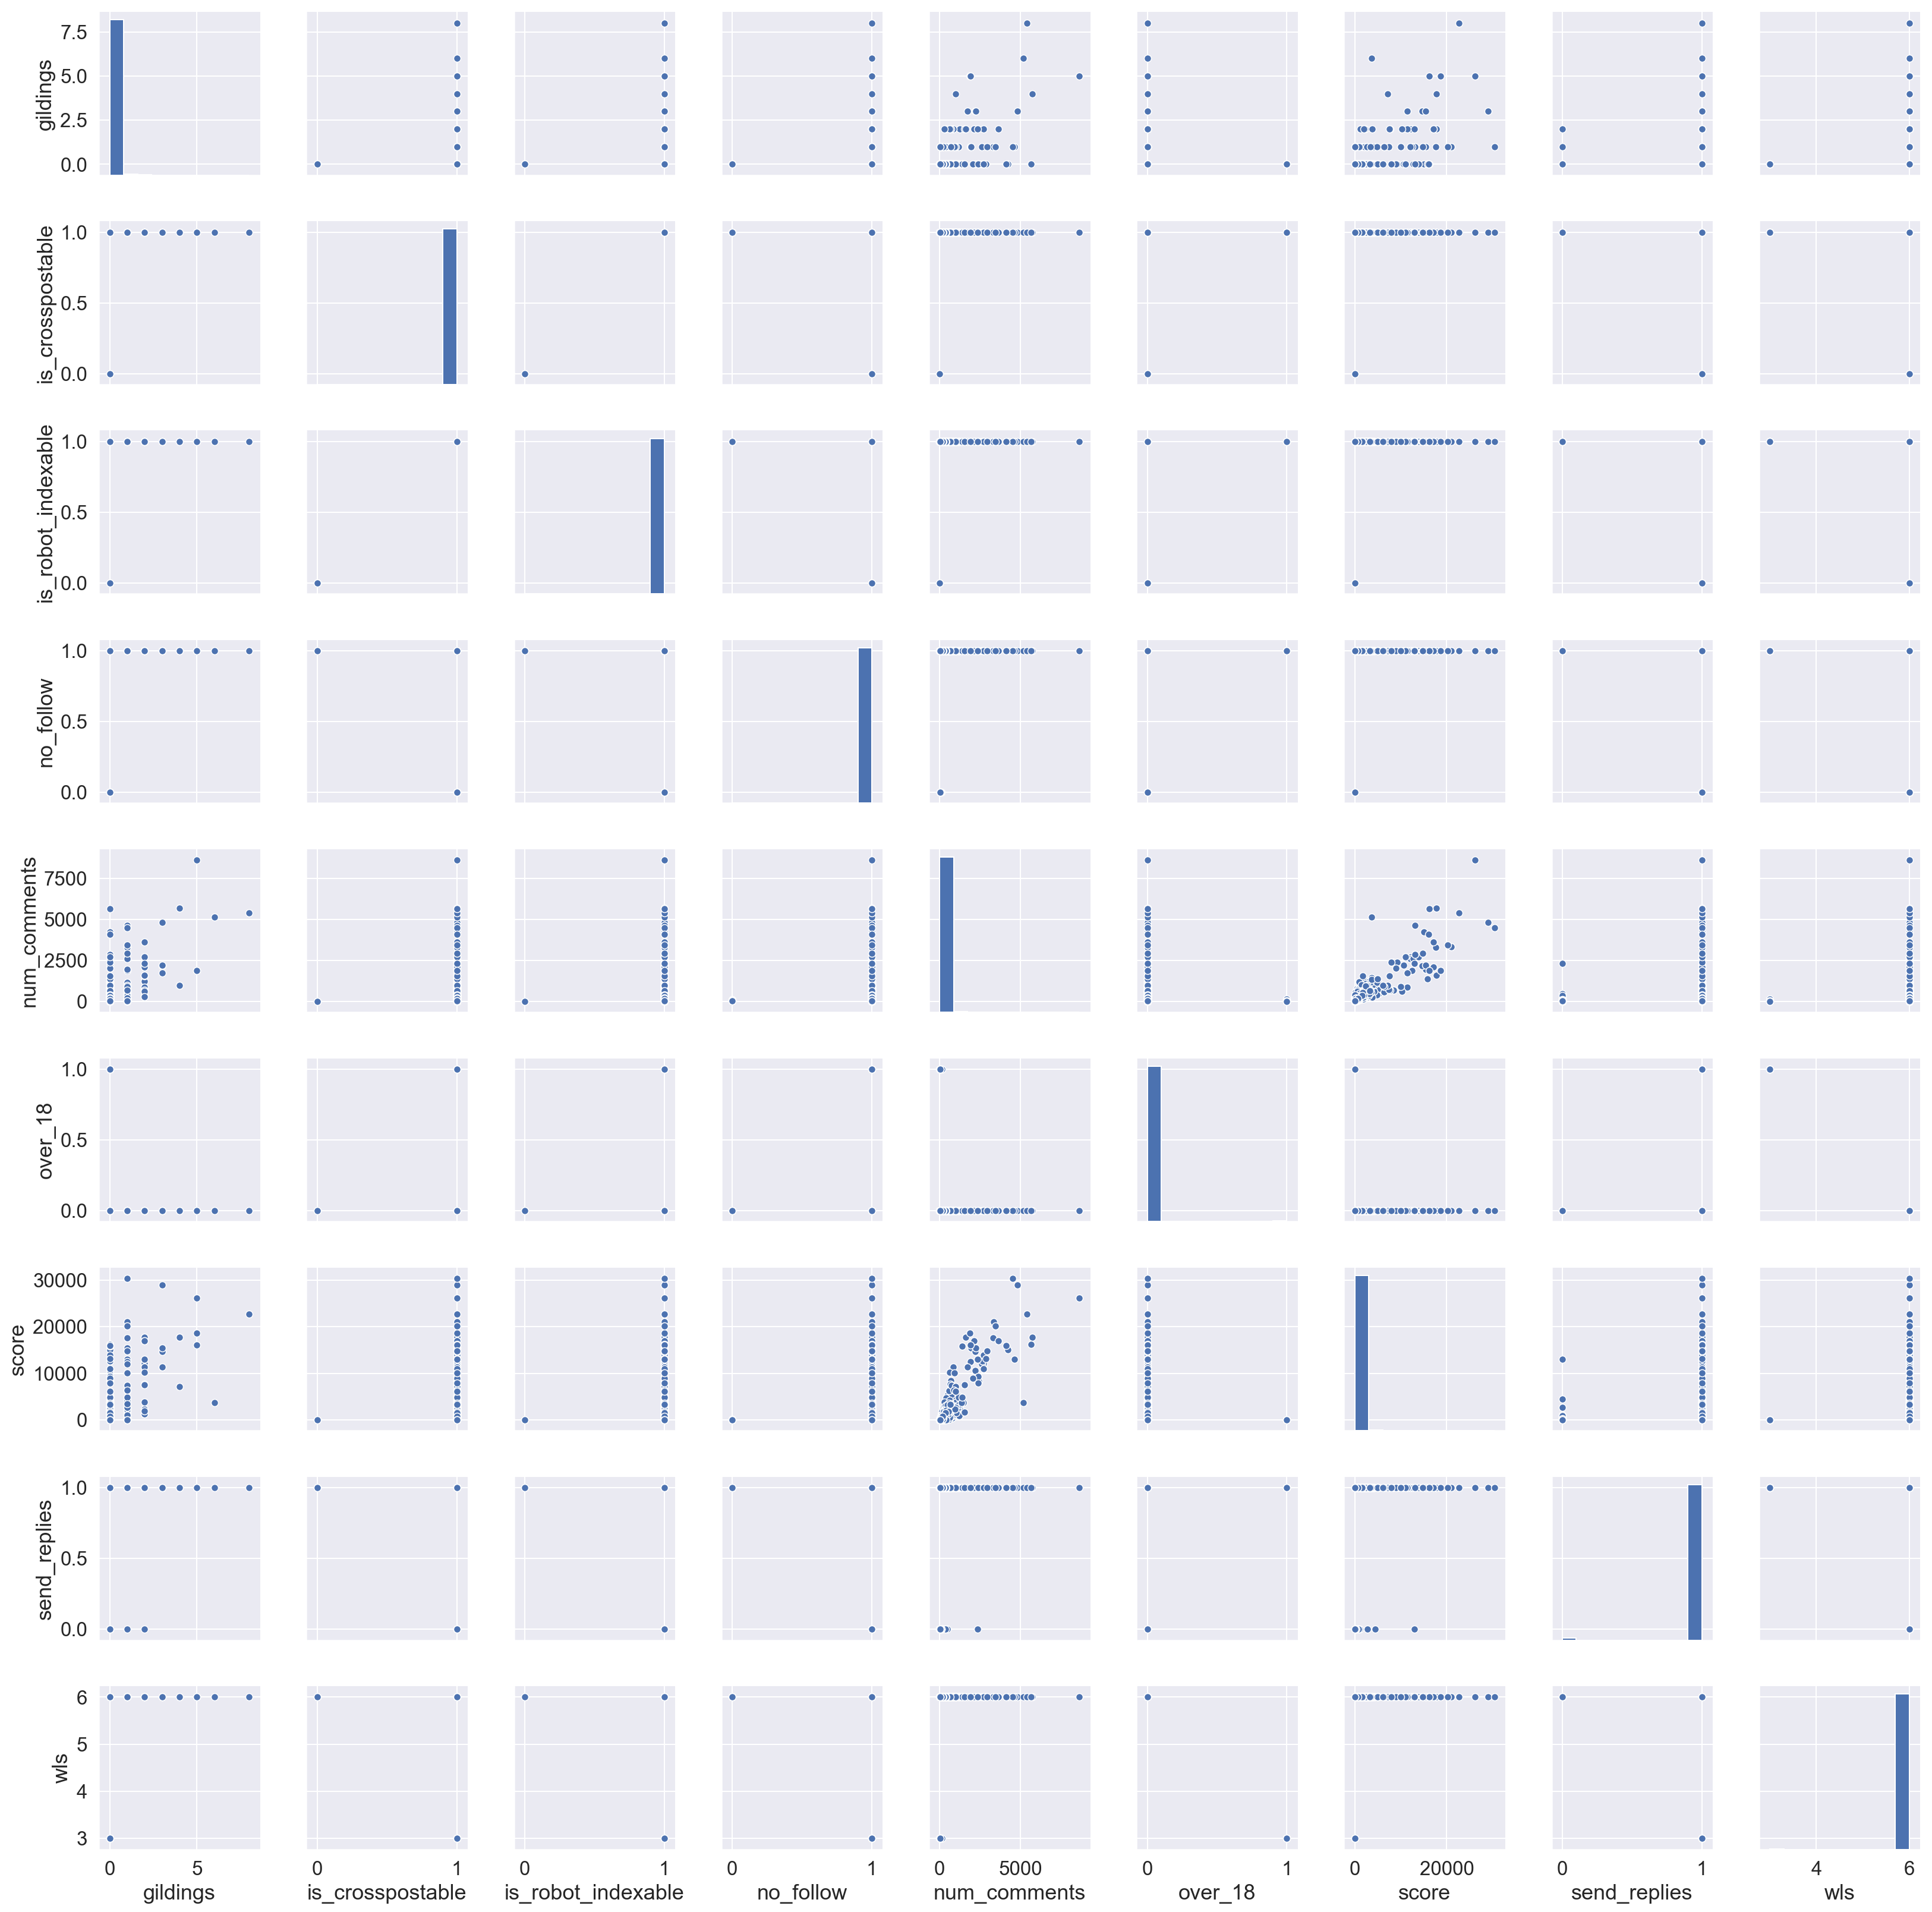

In [12]:
sns.pairplot(reddit_data[reddit_data.corr().columns].astype(float));

<a id='Wordcloud1'></a>
**Wordcloud for NTA:**

Wordmap for class NTA:


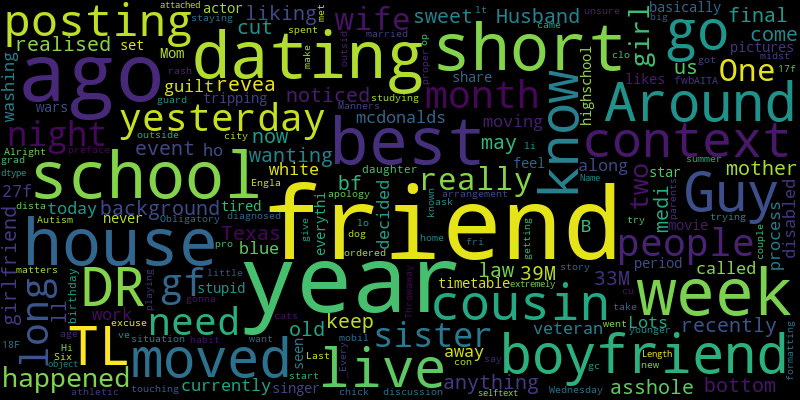

<Figure size 1152x864 with 0 Axes>

In [14]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(16, 12))
a = wordcloud.generate(str(reddit_data['selftext'][reddit_data['y'] == 'NTA']))
print('Wordmap for class NTA:')
a.to_image()

In [15]:
a = pd.DataFrame(a.words_,index=[0])

<a id='Wordcloud2'></a>
**Wordcloud for YTA:**

Wordmap for class YTA:


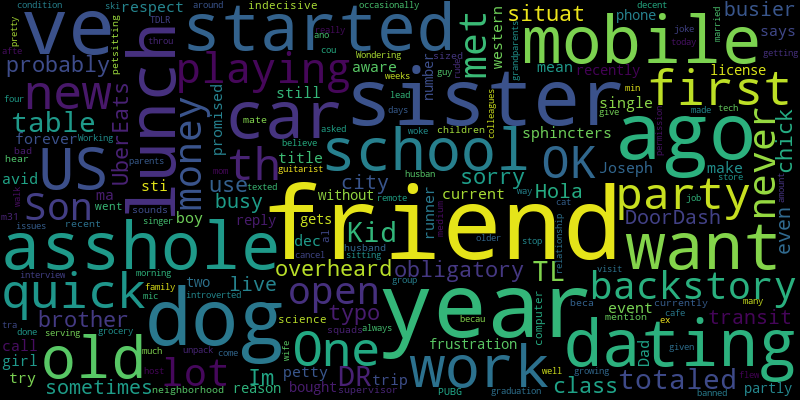

<Figure size 1152x864 with 0 Axes>

In [16]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(16, 12))
b = wordcloud.generate(str(reddit_data['selftext'][reddit_data['y'] == 'YTA']))
print('Wordmap for class YTA:')
b.to_image()

In [17]:
b = pd.DataFrame(b.words_,index=[1])

<a id='TopWC'></a>
**Top Unique Words For Each Class:**

In [18]:
c = pd.concat([a,b],sort=False,ignore_index=True)

c.fillna(-1,inplace=True)

for i in c.columns:
    if (c[i][0] != -1) and (c[i][1] != -1):
        c.drop(columns=[i],inplace=True)

c = c.applymap(lambda x:np.nan if x == -1 else x).T

print('Top ten words for class NTA:\n',list(c[c[0]>=0].sort_values(0,ascending=False).index[:10]),'\n\n')

print('Top ten words for class YTA:\n',list(c[c[1]>=0].sort_values(1,ascending=False).index[:10]))

Top ten words for class NTA:
 ['week', 'short', 'house', 'best', 'posting', 'happened', 'night', 'need', 'month', 'gf'] 


Top ten words for class YTA:
 ['lunch', 'th', 'car', 'Son', 'open', 'lot', 'backstory', 'OK', 'money', 'party']


- [Return to Top of Page](#TopPage)
- [Next Section](./Sub5_Further_EDA.ipynb)